# Exercício Computacional II - Sistemas Nebulosos


- Aluno: Vítor Gabriel Reis Caitité
- Matrícula: 2021712430


# Implementação das funções de pertinência

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from math import *
from sklearn.metrics import mean_squared_error
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
def trimf(x,a,b,c):
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = max([min([(x[i]-a)/(b-a), (c-x[i])/(c-b)]), 0])
    return y

def gaussmf(x,c,sigma):
    return e**(-1/2 * ((x-c)/sigma)**2)

def trapmf(x,a,b,c,d):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] > a and x[i] <= b:
            y[i] = (x[i]-a)/(b-a)
        if x[i] > b and x[i] <= c:
            y[i] = 1
        if x[i] > c and x[i] < d:
            y[i] = (-x[i]+d)/(-c+d)
    return y

def gbellmf(x, a, b, c):
    return 1/(1+abs(((x-c)/a)**(2*b)))

def sigmf(x, c, a):
    return 1/(1 + e**(-a*(x-c)))   

# Questão 1 - Parábola

Aproximar a função $y = x^2, x \in [ 0, 2]$, empregando os mecanismos de inferência do
Mamdani e do Sugeno (linear e constante).

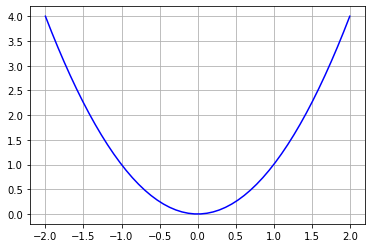

In [12]:
# Universe Variables:
x = np.linspace(-2, 2, 50)
y = np.linspace(0, 4, 50)
y_real = x**2
plt.plot(x, y_real, 'b-')
plt.grid()

## Mecanismo de Inferência de Mandani

In [13]:
def objective_function(v):
    mu_x_1 = gaussmf(x, v[0],v[1])
    mu_x_2 = gaussmf(x, v[2],v[3])
    mu_x_3 = gaussmf(x, v[4],v[5])
    mu_x_4 = gaussmf(x, v[6],v[7])
    mu_x_5 = gaussmf(x, v[8],v[9])

    mu_y_1 = gaussmf(y, v[10],v[11])
    mu_y_2 = gaussmf(y, v[12],v[13])
    mu_y_3 = gaussmf(y, v[14],v[15])
    y_hat = []
    for xi in x:
        # Activation of our fuzzy membership functions at these values.
        x1 = fuzz.interp_membership(x, mu_x_1, xi)
        x2 = fuzz.interp_membership(x, mu_x_2, xi)
        x3 = fuzz.interp_membership(x, mu_x_3, xi)
        x4 = fuzz.interp_membership(x, mu_x_4, xi)
        x5 = fuzz.interp_membership(x, mu_x_5, xi)
    
        # Rule application
        y_1 = np.fmin(np.fmax(x1, x5), mu_y_3)
        y_2 = np.fmin(np.fmax(x2, x4), mu_y_2)
        y_3 = np.fmin(x3, mu_y_1)
    
        # Aggregate all three output membership functions together
        aggregated = np.fmax(y_1, np.fmax(y_2, y_3))
    
        # Calculate defuzzified result
        y_hat.append(fuzz.defuzz(y, aggregated, 'centroid'))
    return mean_squared_error(y_real, y_hat)  


/home/vitor/-/.virtualenvs/k36/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


 The best solution found:                                                                           
 [ 1.86584823  0.27775444 -1.25799497  0.27594243  1.3713583   0.23821574
 -0.02494371  0.36440699 -1.74214029  0.35188575  0.94380934  0.10906972
  0.11303292  0.22190764  3.75686783  0.23414628]

 Objective function:
 0.020504460693325524


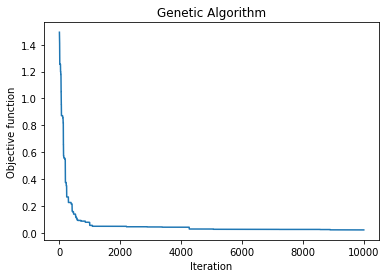

[ 1.86584823  0.27775444 -1.25799497  0.27594243  1.3713583   0.23821574
 -0.02494371  0.36440699 -1.74214029  0.35188575  0.94380934  0.10906972
  0.11303292  0.22190764  3.75686783  0.23414628]


In [14]:
from geneticalgorithm import geneticalgorithm as ga
aux = np.array([[[-2,2], [0, 4]]*5, [[0, 4], [0, 4]]*3])
varbound = []
for i in range(len(aux)):
    for j in range(len(aux[i])):
        varbound.append(aux[i][j])
varbound = np.array(varbound)

algorithm_param = {'max_num_iteration': 10000,\
                   'population_size':100,\
                   'mutation_probability':0.15,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=objective_function, dimension=2*8, variable_type='real',variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()
v = model.output_dict['variable']
print(v) 

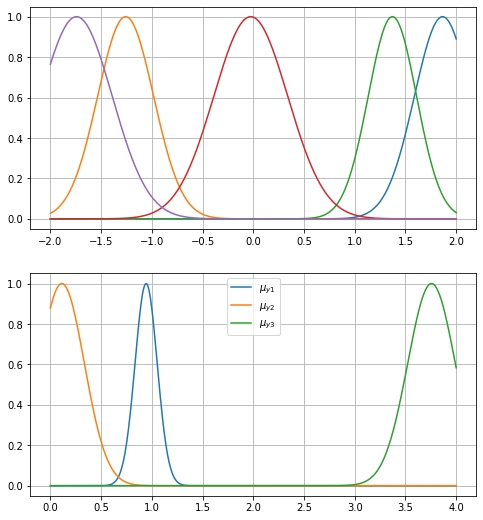

In [15]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))
x = np.linspace(-2, 2, 500)
y = np.linspace(0, 4, 500)
y_real = x**2
mu_x_1 = fuzz.gaussmf(x, v[0],v[1])
mu_x_2 = fuzz.gaussmf(x, v[2],v[3])
mu_x_3 = fuzz.gaussmf(x, v[4],v[5])
mu_x_4 = fuzz.gaussmf(x, v[6],v[7])
mu_x_5 = fuzz.gaussmf(x, v[8],v[9])
ax0.plot(x, mu_x_1,'-', x, mu_x_2,'-', x, mu_x_3,'-', x, mu_x_4,'-', x, mu_x_5,'-')
legend = plt.legend([r'$\mu_{x1}$', r'$\mu_{x2}$', r'$\mu_{x3}$', r'$\mu_{x4}$', r'$\mu_{x5}$'])
ax0.grid()

mu_y_1 = fuzz.gaussmf(y, v[10],v[11])
mu_y_2 = fuzz.gaussmf(y, v[12],v[13])
mu_y_3 = fuzz.gaussmf(y, v[14],v[15])
ax1.plot(y, mu_y_1,'-', y, mu_y_2,'-', y, mu_y_3,'-')
legend = plt.legend([r'$\mu_{y1}$', r'$\mu_{y2}$', r'$\mu_{y3}$'])
ax1.grid()
y_hat = []
for xi in x:
    # Activation of our fuzzy membership functions at these values.
    x1 = fuzz.interp_membership(x, mu_x_1, xi)
    x2 = fuzz.interp_membership(x, mu_x_2, xi)
    x3 = fuzz.interp_membership(x, mu_x_3, xi)
    x4 = fuzz.interp_membership(x, mu_x_4, xi)
    x5 = fuzz.interp_membership(x, mu_x_5, xi)
    
    # Rule application
    y_1 = np.fmin(np.fmax(x1, x5), mu_y_3)
    y_2 = np.fmin(np.fmax(x2, x4), mu_y_2)
    y_3 = np.fmin(x3, mu_y_1)
    
    # Aggregate all three output membership functions together
    aggregated = np.fmax(y_1, np.fmax(y_2, y_3))
    
    # Calculate defuzzified result
    y_hat.append(fuzz.defuzz(y, aggregated, 'centroid')) 

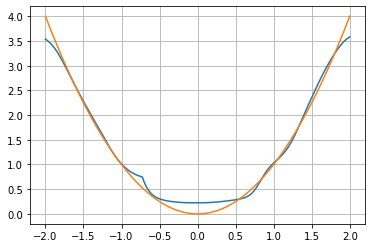

In [16]:
plt.plot(x, y_hat, x, y_real)
plt.grid()

In [17]:
mean_squared_error(y_real, y_hat)

0.01638688543409073

## Mecanismo de Inferência de Sugeno (Constante)

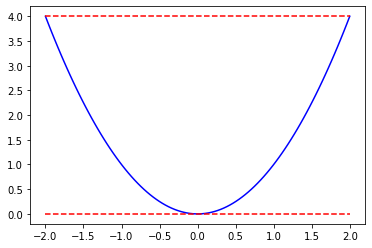

In [60]:
x = np.linspace(-2, 2, 100)
y = np.linspace(0, 4, 100)
y_real = x**2
y1 = np.ones(100)*(4)
y2 = np.ones(100)*(0)
plt.plot(x, y_real, 'b-', x, y1,'r--', x, y2, 'r--')

In [79]:
def objective_function(v):
    x = np.linspace(-2, 2, 100)
    y = x**2
    
    mu_y1 = gaussmf(x, v[0],v[1])
    mu_y2 = gaussmf(x, v[2],v[3])
            
    div = mu_y1 + mu_y2
    div[div==0] = 0.000001
    
    y1 = np.ones(100)*(4)
    y2 = np.ones(100)*(0)
    y_hat = np.divide(np.multiply(mu_y1, y1) + np.multiply(mu_y2, y2), div)
    return mean_squared_error(y, y_hat)

 The best solution found:                                                                           
 [-1.83964427 -0.51579938 -1.06255311  0.39250326]

 Objective function:
 0.023865032481989314


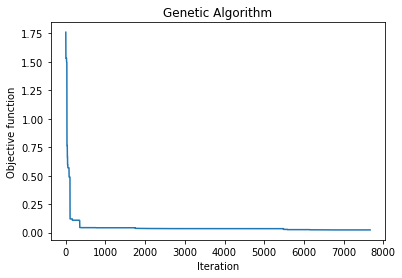

In [80]:
from geneticalgorithm import geneticalgorithm as ga

aux = np.array([[[-2,2], [-10, 10]]*2])
varbound = []
for i in range(len(aux)):
    for j in range(len(aux[i])):
        varbound.append(aux[i][j])
varbound = np.array(varbound)

algorithm_param = {'max_num_iteration': 10000,\
                   'population_size':100,\
                   'mutation_probability':0.15,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':1000}

model=ga(function=objective_function, dimension=2*2, variable_type='real',variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()
v = model.output_dict['variable']
print(v) 

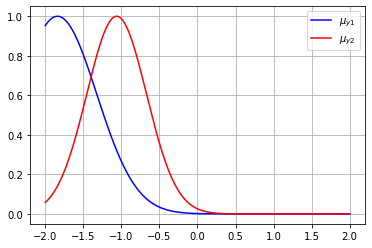

In [89]:
x = np.linspace(-2, 2, 500)
y = x**2
y1 = np.ones(500)*(4)
y2 = np.ones(500)*(0)
mu_y1 = gaussmf(x, v[0],v[1])
mu_y2 = gaussmf(x, v[2],v[3])
#mu_y3 = gaussmf(x, v[4],v[5])
plt.plot(x,mu_y1,'b-',x,mu_y2,'r-')
legend = plt.legend([r'$\mu_{y1}$', r'$\mu_{y2}$'])
plt.grid()

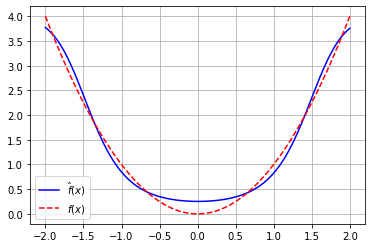

In [90]:
div = mu_y1 + mu_y2
div[div==0] = 0.00001

y_hat = np.divide(np.multiply(mu_y1, y1) + np.multiply(mu_y2, y2), div )
plt.plot(x,y_hat,'b-',x,y,'r--')
legend = plt.legend([r'$\hat{f}(x)$', r'$f(x)$'])
plt.grid()

## Mecanismo de Inferência de Sugeno 

### 2 Regras, pertinência do tipo gaussiana 

$y_1 = 2x, \ \ \ \ \ \ \mu_{y1} = \mathrm{gauss}(x, 0.74, -2.6)$

$y_2 = -2x, \ \ \ \ \mu_{y2} = \mathrm{gauss}(x, -0.74, 2.6)$

In [160]:
def objective_function(v):
    x = np.linspace(-2, 2, 50)
    y = x**2
    
    mu_y1 = sigmf(x, v[0],v[1])
    mu_y2 = sigmf(x, v[2],v[3])
            
    div = mu_y1 + mu_y2
    div[div==0] = 0.000001
    
    y1 = -2*x
    y2 = 2*x
    y_hat = np.divide(np.multiply(mu_y1, y1) + np.multiply(mu_y2, y2), div)
    return mean_squared_error(y, y_hat)

 The best solution found:                                                                           
 [ 0.74172897 -2.60830785 -0.74182757  2.60704225]

 Objective function:
 0.007353824873154179


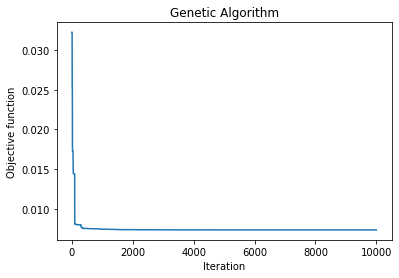

[ 0.74172897 -2.60830785 -0.74182757  2.60704225]


In [168]:
from geneticalgorithm import geneticalgorithm as ga

aux = np.array([[[-2,2], [-10, 10]]*2])
varbound = []
for i in range(len(aux)):
    for j in range(len(aux[i])):
        varbound.append(aux[i][j])
varbound = np.array(varbound)

algorithm_param = {'max_num_iteration': 10000,\
                   'population_size':100,\
                   'mutation_probability':0.15,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':1000}

model=ga(function=objective_function, dimension=2*2, variable_type='real',variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()
v = model.output_dict['variable']
print(v) 

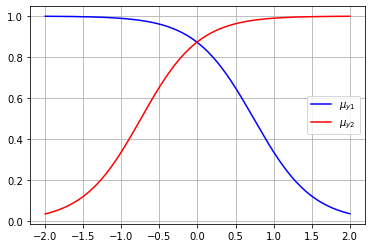

In [165]:
x = np.linspace(-2, 2, 200)
y = x**2
y1 = -2*x
y2 = 2*x
mu_y1 = sigmf(x, v[0],v[1])
mu_y2 = sigmf(x, v[2],v[3])
#mu_y3 = gaussmf(x, v[4],v[5])
plt.plot(x,mu_y1,'b-',x,mu_y2,'r-')
legend = plt.legend([r'$\mu_{y1}$', r'$\mu_{y2}$'])
plt.grid()

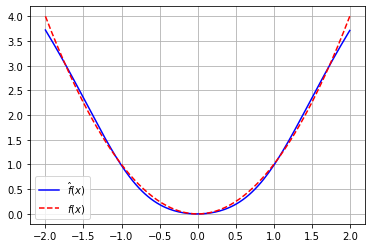

In [169]:
div = mu_y1 + mu_y2
div[div==0] = 0.00001

y_hat = np.divide(np.multiply(mu_y1, y1) + np.multiply(mu_y2, y2), div )
plt.plot(x,y_hat,'b-',x,y,'r--')
legend = plt.legend([r'$\hat{f}(x)$', r'$f(x)$'])
plt.grid()

In [170]:
mean_squared_error(list(y), list(y_hat))

0.006042124065480065

# Questão 1 - Função Sinc

$y = \sin(x)/x, x \in \left[ 0, 2\pi \right]$

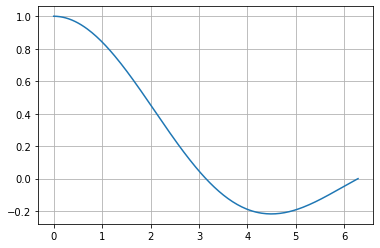

In [56]:
x = np.linspace(0.0001,2*pi,200)
y = np.linspace(-1, 1, 200)
y_real = np.sin(x)/x
plt.plot(x, y_real)
plt.grid()

## Mecanismo de Inferência de Mandani

In [65]:
def objective_function(v):
    x = np.linspace(0.000001,2*pi,100)
    y = np.linspace(-1, 1, 100)
    y_real = np.sin(x)/x
    
    mu_x_1 = gaussmf(x, v[0],v[1])
    mu_x_2 = gaussmf(x, v[2],v[3])
    mu_x_3 = gaussmf(x, v[4],v[5])
    
    mu_y_1 = gaussmf(y, v[6],v[7])
    mu_y_2 = gaussmf(y, v[8],v[9])
    mu_y_3 = gaussmf(y, v[10],v[11])
    
    y_hat = []
    for xi in x:
        # Activation of our fuzzy membership functions at these values.
        x1 = fuzz.interp_membership(x, mu_x_1, xi)
        x2 = fuzz.interp_membership(x, mu_x_2, xi)
        x3 = fuzz.interp_membership(x, mu_x_3, xi)
    
        # Rule application
        y_1 = np.fmin(x1, mu_y_1)
        y_2 = np.fmin(x2, mu_y_2)
        y_3 = np.fmin(x3, mu_y_3)
    
        # Aggregate all three output membership functions together
        aggregated = np.fmax(y_1, np.fmax(y_2, y_3))
    
        # Calculate defuzzified result
        y_hat.append(fuzz.defuzz(y, aggregated, 'centroid'))
    return mean_squared_error(y_real, y_hat)  

 The best solution found:                                                                           
 [ 5.76136064  1.08400284  5.1000342   1.30771461  4.06197602  3.58644407
  0.68501598  0.06404333 -0.91944658  0.46010336  0.89269796  0.08018449]

 Objective function:
 0.002884213779273281


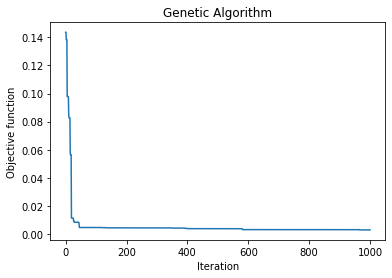

[ 5.76136064  1.08400284  5.1000342   1.30771461  4.06197602  3.58644407
  0.68501598  0.06404333 -0.91944658  0.46010336  0.89269796  0.08018449]


In [75]:
from geneticalgorithm import geneticalgorithm as ga
aux = np.array([[[0.0001, 2*pi], [0, 4]]*3, [[-1, 1], [0, 4]]*3])
varbound = []
for i in range(len(aux)):
    for j in range(len(aux[i])):
        varbound.append(aux[i][j])
varbound = np.array(varbound)

algorithm_param = {'max_num_iteration': 1000,\
                   'population_size':100,\
                   'mutation_probability':0.15,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':1000}

model=ga(function=objective_function, dimension=2*6, variable_type='real',variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()
v = model.output_dict['variable']
print(v)

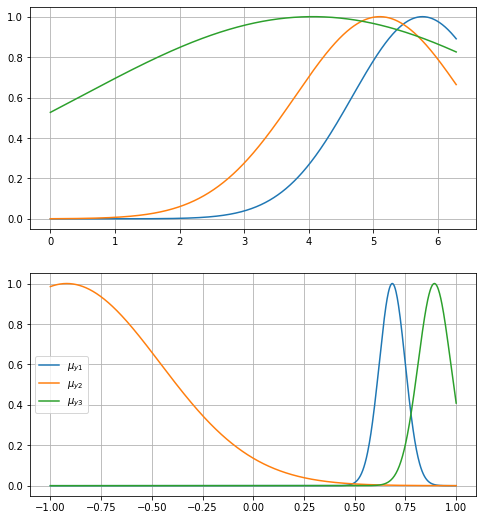

In [76]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))
x = np.linspace(0.000001,2*pi,1000)
y = np.linspace(-1, 1, 1000)
y_real = np.sin(x)/x
mu_x_1 = gaussmf(x, v[0],v[1])
mu_x_2 = gaussmf(x, v[2],v[3])
mu_x_3 = gaussmf(x, v[4],v[5])

ax0.plot(x, mu_x_1,'-', x, mu_x_2,'-', x, mu_x_3,'-')
legend = plt.legend([r'$\mu_{x1}$', r'$\mu_{x2}$', r'$\mu_{x3}$', r'$\mu_{x4}$', r'$\mu_{x5}$'])
ax0.grid()

mu_y_1 = gaussmf(y, v[6],v[7])
mu_y_2 = gaussmf(y, v[8],v[9])
mu_y_3 = gaussmf(y, v[10],v[11])
ax1.plot(y, mu_y_1,'-', y, mu_y_2,'-', y, mu_y_3,'-')
legend = plt.legend([r'$\mu_{y1}$', r'$\mu_{y2}$', r'$\mu_{y3}$'])
ax1.grid()
y_hat = []
for xi in x:
    # Activation of our fuzzy membership functions at these values.
    x1 = fuzz.interp_membership(x, mu_x_1, xi)
    x2 = fuzz.interp_membership(x, mu_x_2, xi)
    x3 = fuzz.interp_membership(x, mu_x_3, xi)
    
    # Rule application
    y_1 = np.fmin(x1, mu_y_1)
    y_2 = np.fmin(x2, mu_y_2)
    y_3 = np.fmin(x3, mu_y_3)
    
    # Aggregate all three output membership functions together
    aggregated = np.fmax(y_1, np.fmax(y_2, y_3))
    
    # Calculate defuzzified result
    y_hat.append(fuzz.defuzz(y, aggregated, 'centroid')) 

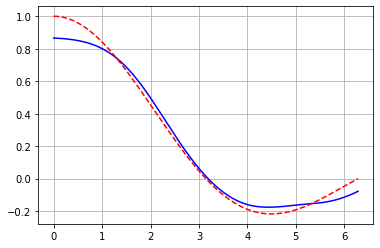

In [78]:
plt.plot(x, y_hat, 'b', x, y_real, 'r--')
plt.grid()

In [79]:
mean_squared_error(y_real, y_hat)

0.002798629186108471

## Mecanismo de Inferência de Sugeno (Constante)

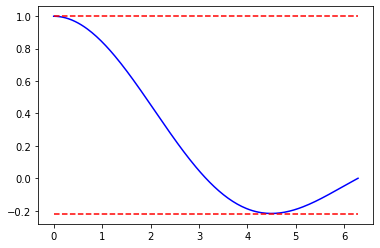

In [119]:
x = np.linspace(0.0001,2*pi,200)
y = np.linspace(-1, 1, 200)
y_real = np.sin(x)/x
y1 = np.ones(len(x))*1
y2 = np.ones(len(x))*(-0.22)
plt.plot(x,y_real,'b-',x,y1,'r--', x, y2, 'r--')

In [120]:
def objective_function(v):
    x = np.linspace(0.0001,2*pi,100)
    y = np.sin(x)/x
    
    mu_y1 = sigmf(x, v[0],v[1])
    mu_y2 = sigmf(x, v[2],v[3])
            
    div = mu_y1 + mu_y2
    div[div==0] = 0.000001
    
    y1 = np.ones(len(x))*1
    y2 = np.ones(len(x))*(-0.22)
    y_hat = np.divide(np.multiply(mu_y1, y1) + np.multiply(mu_y2, y2), div)
    return mean_squared_error(y, y_hat)

 The best solution found:                                                                           
 [ 2.50509312 -2.1258522   1.79753083  2.33206889]

 Objective function:
 0.0037113083888542712


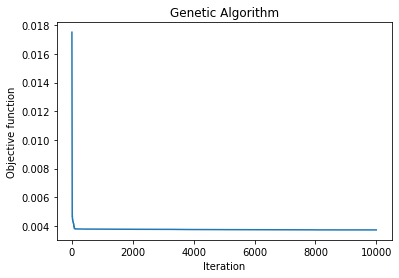

[ 2.50509312 -2.1258522   1.79753083  2.33206889]


In [121]:
from geneticalgorithm import geneticalgorithm as ga

aux = np.array([[[0,2*pi], [-10, 10]]*2])
varbound = []
for i in range(len(aux)):
    for j in range(len(aux[i])):
        varbound.append(aux[i][j])
varbound = np.array(varbound)

algorithm_param = {'max_num_iteration': 10000,\
                   'population_size':100,\
                   'mutation_probability':0.15,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':1000}

model=ga(function=objective_function, dimension=2*2, variable_type='real',variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()
v = model.output_dict['variable']
print(v) 

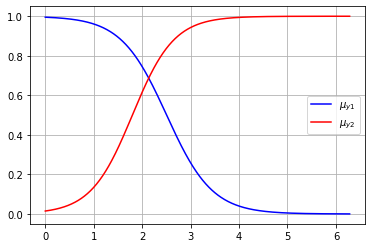

In [122]:
x = np.linspace(0.0001,2*pi,500)
y = np.sin(x)/x
y1 = np.ones(500)*(1)
y2 = np.ones(500)*(-0.22)
mu_y1 = sigmf(x, v[0],v[1])
mu_y2 = sigmf(x, v[2],v[3])
#mu_y3 = gaussmf(x, v[4],v[5])
plt.plot(x,mu_y1,'b-',x,mu_y2,'r-')
legend = plt.legend([r'$\mu_{y1}$', r'$\mu_{y2}$'])
plt.grid()

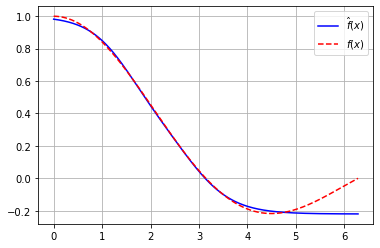

In [123]:
div = mu_y1 + mu_y2
div[div==0] = 0.00001

y_hat = np.divide(np.multiply(mu_y1, y1) + np.multiply(mu_y2, y2), div )
plt.plot(x,y_hat,'b-',x,y,'r--')
legend = plt.legend([r'$\hat{f}(x)$', r'$f(x)$'])
plt.grid()

In [125]:
mean_squared_error(y, y_hat)

0.0035416152977132544

## Mecanismo de Inferência de Sugeno (Linear)

### 3 Regras, pertinência tipo gaussiana:

$y_1 = 1,  \ \ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \mu_{y1} = \mathrm{trimf}(x,-\pi,0,\pi)$

$y_2 = -\dfrac{x}{3} + 1.1, \ \ \ \ \ \ \mu_{y2} = \mathrm{trimf}(x,0,\pi,2\pi)$

$y_3 = \dfrac{x}{8} - 0.8, \ \ \ \ \ \ \ \ \ \mu_{y3} = \mathrm{trimf}(x,\pi,2\pi,3\pi)$

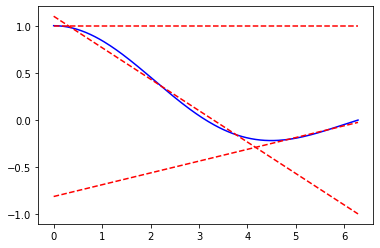

In [16]:
y1 = np.ones(len(x))
y2 = -x/3 + 1.1
y3 = x/8-0.81
plt.plot(x,y,'b-',x,y1,'r--', x, y2, 'r--', x, y3, 'r--')

In [27]:
def objective_function(v):
    x = np.linspace(0.00001,2*pi,50)
    y = np.sin(x)/x
    
    mu_y1 = gaussmf(x, v[0],v[1])
    mu_y2 = gaussmf(x, v[2],v[3])
    mu_y3 = gaussmf(x, v[4],v[5])
    
    div = mu_y1 + mu_y2 + mu_y3
    div[div==0] = 0.000001
    
    y1 = np.ones(len(x))
    y2 = -x/3 + 1.1
    y3 = x/8-0.81
    y_hat = np.divide(np.multiply(mu_y1, y1) + np.multiply(mu_y2, y2) + np.multiply(mu_y3, y3), div )
    return mean_squared_error(y, y_hat)  


 The best solution found:                                                                           
 [0.11463372 1.85530203 2.38771281 1.18321771 4.18155448 1.38501465]

 Objective function:
 7.212556236300381e-05


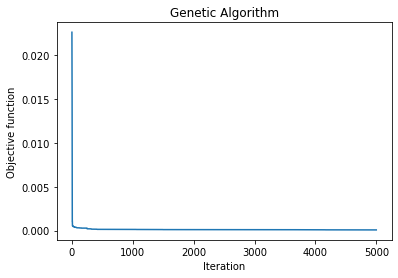

[0.11463372 1.85530203 2.38771281 1.18321771 4.18155448 1.38501465]


In [38]:
from geneticalgorithm import geneticalgorithm as ga

varbound = [[0,2*pi]]*5
aux = np.array([[[0,2*pi], [0, 4]]*3])
varbound = []
for i in range(len(aux)):
    for j in range(len(aux[i])):
        varbound.append(aux[i][j])
varbound = np.array(varbound)

algorithm_param = {'max_num_iteration': 5000,\
                   'population_size':100,\
                   'mutation_probability':0.15,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':1000}

model=ga(function=objective_function, dimension=3*2, variable_type='real',variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()
v = model.output_dict['variable']
print(v) 

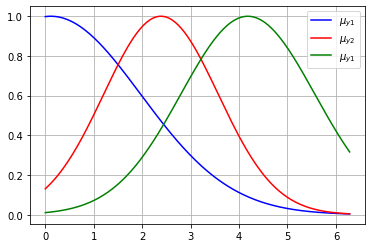

In [41]:
mu_y1 = gaussmf(x, v[0],v[1])
mu_y2 = gaussmf(x, v[2],v[3])
mu_y3 = gaussmf(x, v[4],v[5])
plt.plot(x,mu_y1,'b-',x,mu_y2,'r-',x, mu_y3,'g-')
legend = plt.legend([r'$\mu_{y1}$', r'$\mu_{y2}$', r'$\mu_{y1}$'])
plt.grid()

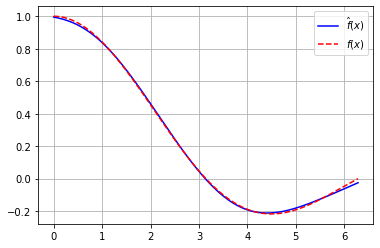

In [42]:
div = mu_y1 + mu_y2 + mu_y3
div[div==0] = 0.001

y_hat = np.divide(np.multiply(mu_y1, y1) + np.multiply(mu_y2, y2) + np.multiply(mu_y3, y3), div )
plt.plot(x,y_hat,'b-',x,y,'r--')
legend = plt.legend([r'$\hat{f}(x)$', r'$f(x)$'])
plt.grid()

In [43]:
mean_squared_error(list(y), list(y_hat))

6.795292328968142e-05